In [17]:
%matplotlib inline
import numpy as np
import scipy as sci
import scipy.constants as const
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

In [18]:
#Brechungsindex
n=1.37927
#Laserfrequenz
wl=532e-9
def calcq(angel):
    return 4*np.pi*n/wl*np.sin(angel/180*np.pi/2)
g =lambda tau,D: np.exp(-2*q**2*D*tau)
def g2(tau,D,C,q):
    return np.exp(-2*q**2*D*tau)*C


In [19]:

def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    sci.optimize.curve_fit(g,time,corr,)
    ax.plot(time,np.abs(corr),".",label=r"{} $^\circ$".format(labels))
    ax.loglog()
    ax.set_title(name)

In [20]:
#Alles in einen plot :D
namelist=[]
angels=[]

for x in range(2,16):
    namelist.append("Data/A/{}.ASC".format(x*10))
    angels.append(x*10)
"""
fig,ax=plt.subplots(dpi=144)
for x in range(len(namelist)):
    plotcorr(namelist[x],angels[x],ax)
ax.legend()"""

'\nfig,ax=plt.subplots(dpi=144)\nfor x in range(len(namelist)):\n    plotcorr(namelist[x],angels[x],ax)\nax.legend()'

In [21]:

def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    q=calcq(labels)
    D=1
    #popt,pcov=sci.optimize.curve_fit(g,time,corr,p0=0)
    lin=np.linspace(0,time[182],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time,D,C:g2(time,D,C,q),time,corr,p0=(1e-15,1))
    print(popt)
    fig,ax=plt.subplots(dpi=144)

    ax.plot(time,(np.abs(corr)),".",label=r"{} $^\circ$".format(labels))
    ax.plot(time,g2(time,*popt,q))
    ax.semilogx()
    ax.set_title(r"{} $^\circ$".format(labels))
    fig.savefig("Plots/A/{}".format(labels))
    return popt[0]

[3.98503041e-15 5.86826984e-01]
[4.02716295e-15 5.65498192e-01]
[3.88603200e-15 5.55666443e-01]
[4.03816483e-15 5.44648534e-01]
[3.96739950e-15 5.48671443e-01]
[3.93890897e-15 5.52500189e-01]
[3.83539964e-15 5.62902528e-01]
[4.05086342e-15 5.61366551e-01]
[3.95729298e-15 5.32545173e-01]
[3.91840973e-15 5.56474834e-01]
[3.88558179e-15 5.50520760e-01]
[3.83680232e-15 5.11592337e-01]
[3.86257499e-15 4.48985449e-01]
[3.84196036e-15 4.13825486e-01]


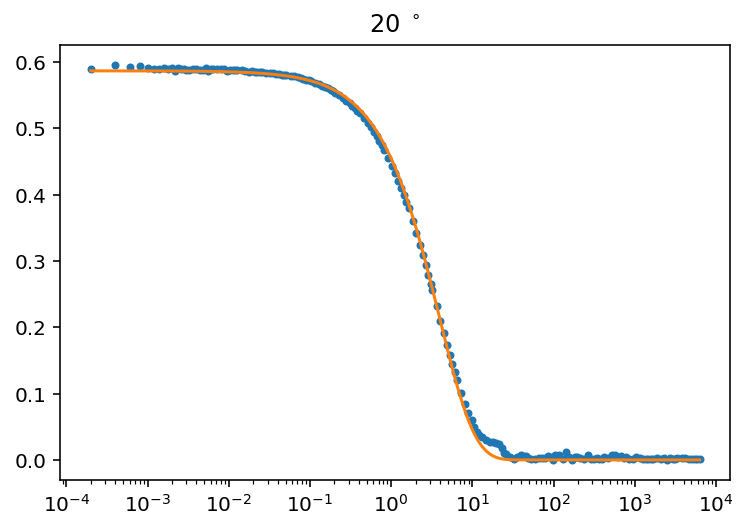

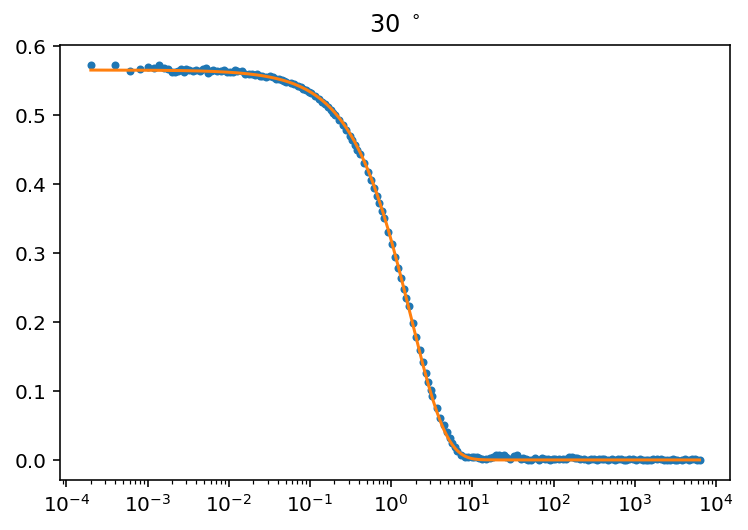

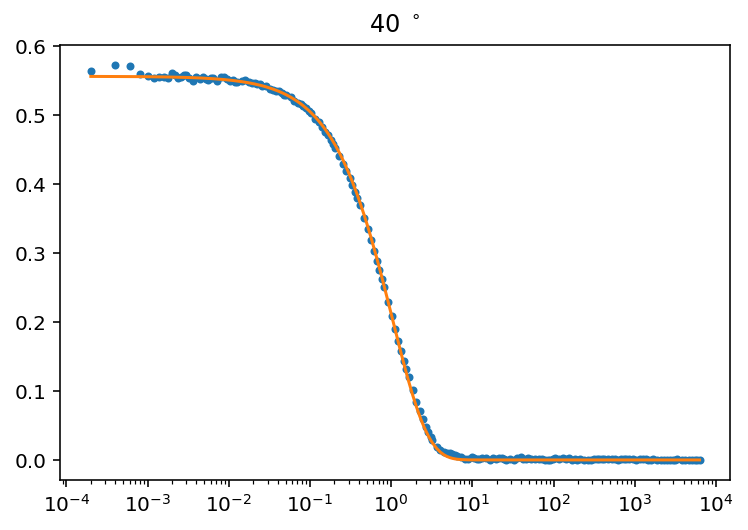

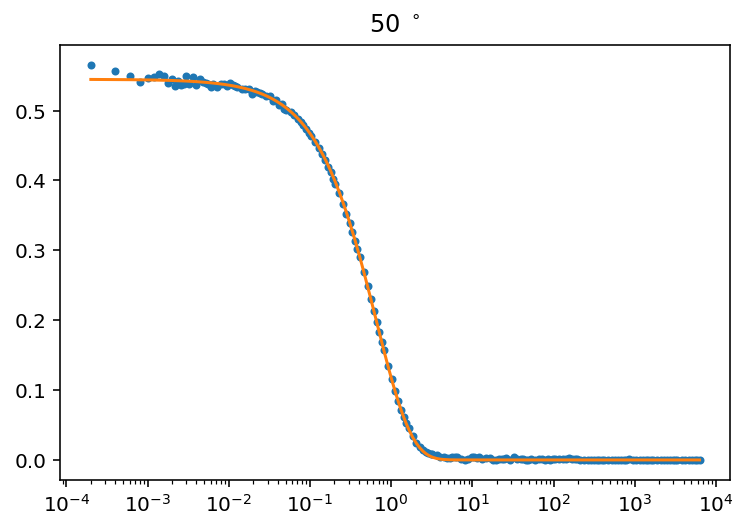

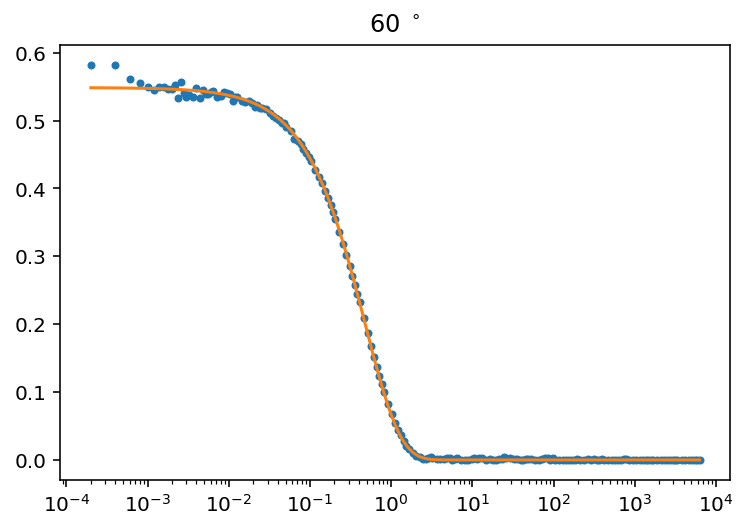

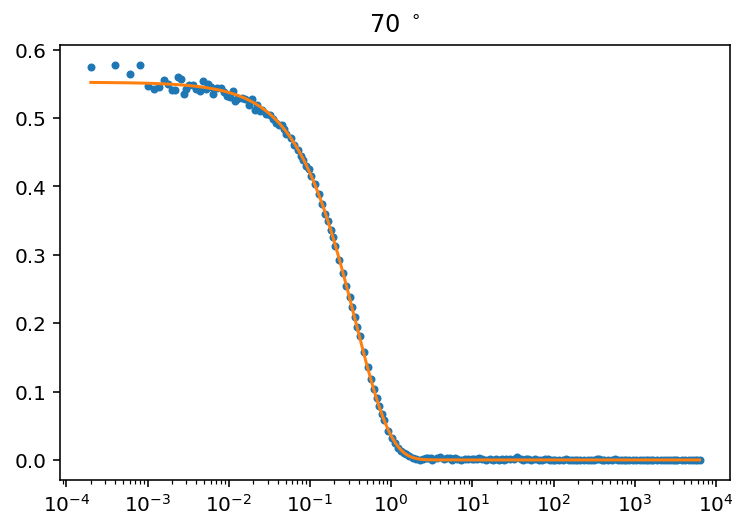

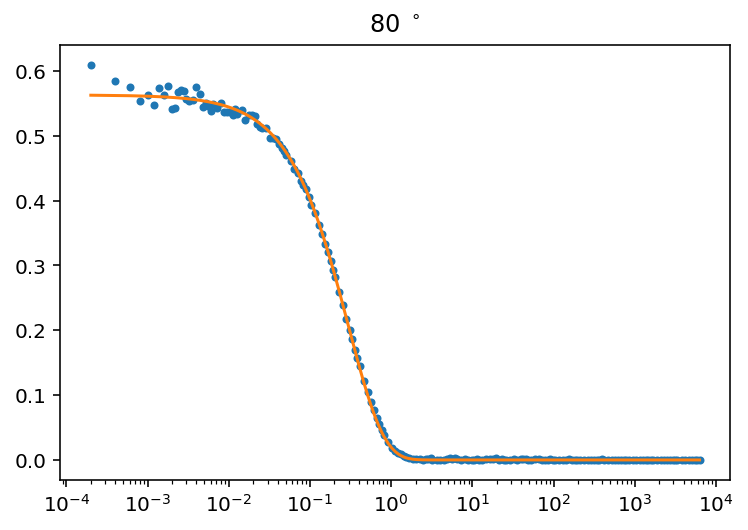

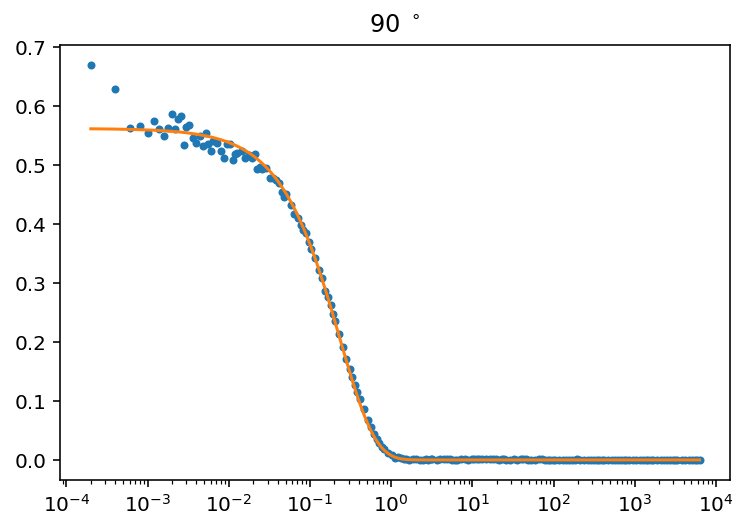

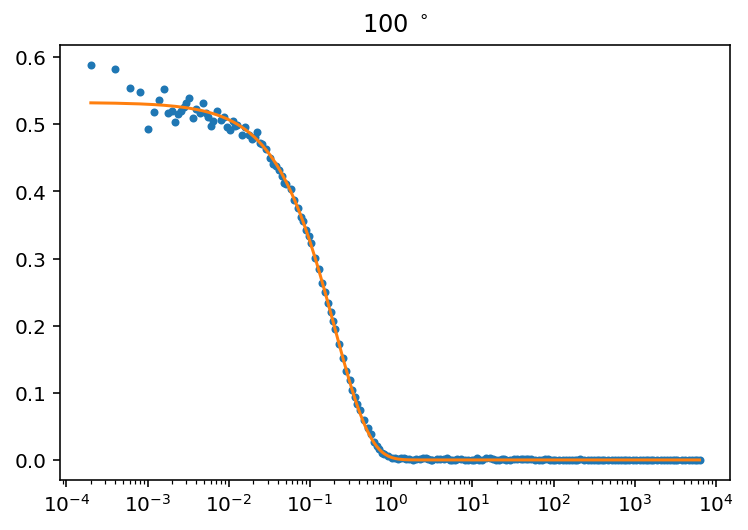

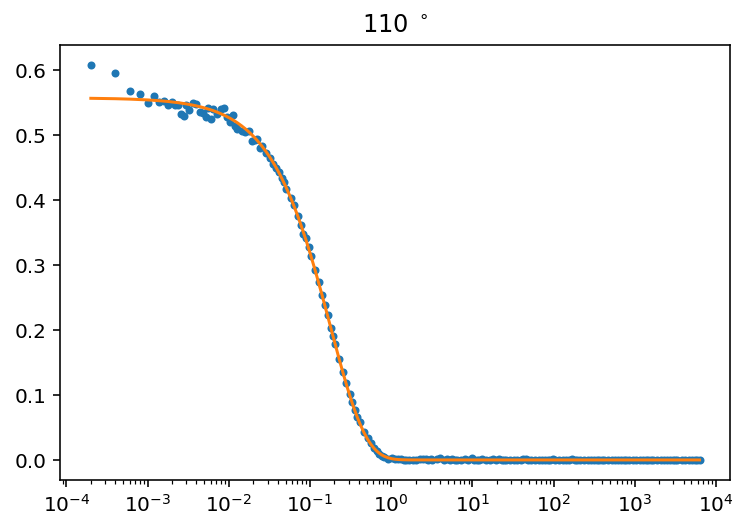

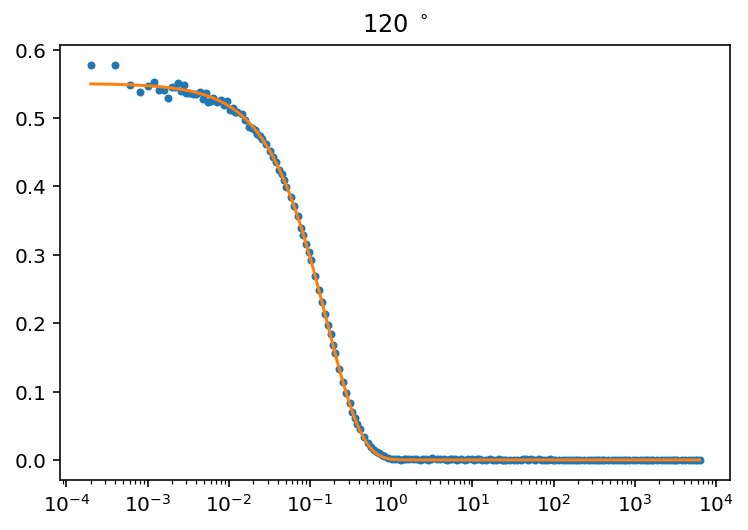

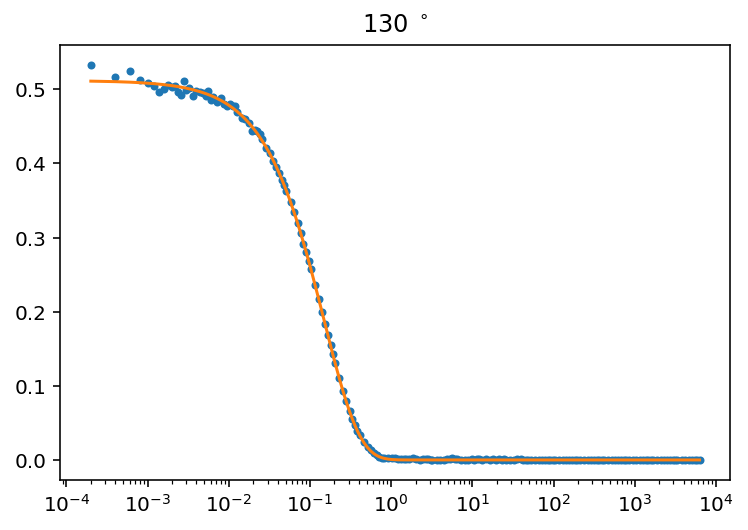

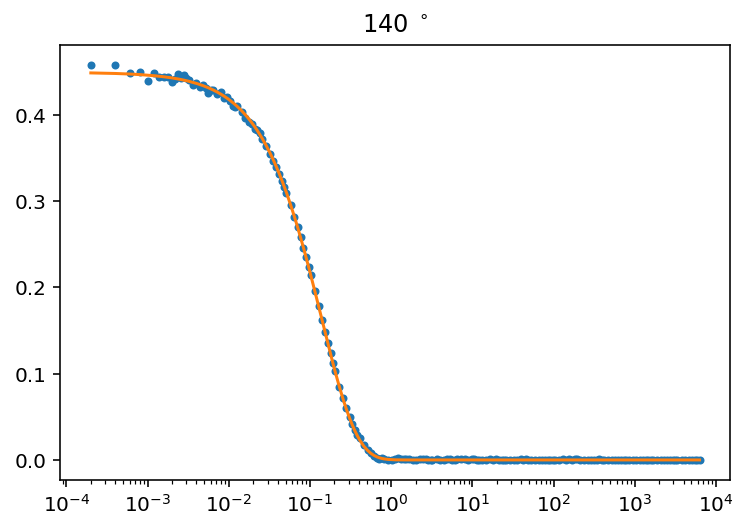

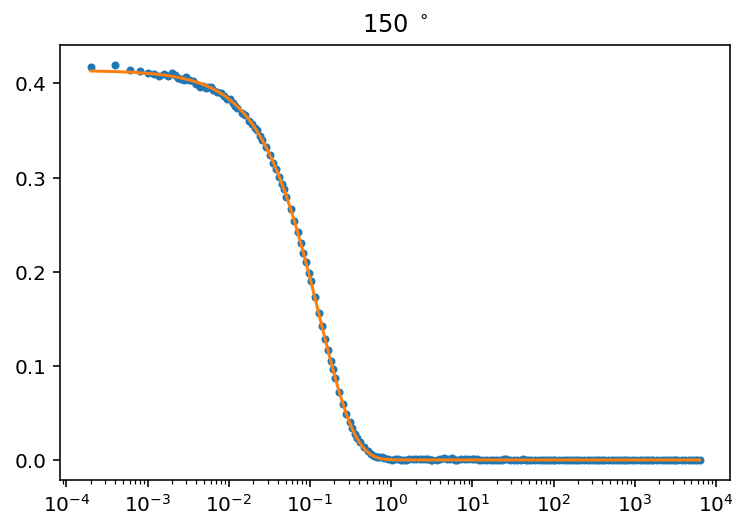

In [22]:
ax=0
#Viele Plots
namelist=[]
Ds=[]
for x in range(2,16):
     namelist.append("Data/A/{}.ASC".format(x*10))
for x in range(len(namelist)):
    Ds.append(plotcorr(namelist[x],angels[x],ax))
#plotcorr(namelist[0],angels[0],ax)
#ax.legend()

mean=np.mean(Ds)



In [23]:
print(n)
vi=1.959e-3
print(mean)
print(const.Boltzmann*300/(6*np.pi*vi*mean))

1.37927
3.930827419635001e-15
2.8535458200544564e-05


In [24]:
#B
def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    q=calcq(labels)
    D=1
    #popt,pcov=sci.optimize.curve_fit(g,time,corr,p0=0)
    lin=np.linspace(0,time[182],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time,D,C:g2(time,D,C,q) ,time,corr , p0=(1e-15,1))
    print(popt)
    fig,ax=plt.subplots(dpi=144)

    ax.plot(time,(np.abs(corr)),".",label=r"{} $^\circ$".format(labels))
    ax.plot(time,g2(time,*popt,q))
    ax.semilogx()
    ax.set_title(r"{} $^\circ$".format(labels))
    ax.legend()
    fig.savefig("Plots/B/{}".format(labels))
    return(popt[0])

[4.80317333e-15 5.80166738e-01]
[4.73256295e-15 5.64297570e-01]
[4.54118841e-15 5.63508937e-01]
[4.81593280e-15 5.52084063e-01]
[4.74943779e-15 5.35686202e-01]
[4.86080409e-15 5.47119486e-01]
[4.96966462e-15 5.46484332e-01]
[4.94900161e-15 5.34167615e-01]
[4.92843464e-15 5.32712107e-01]
[4.96604642e-15 5.08051356e-01]
[4.74672303e-15 4.97255157e-01]
[4.80974270e-15 4.84262739e-01]
[4.74414394e-15 4.60881393e-01]
[4.77514347e-15 4.22048917e-01]
4.813714271689356e-15
3.309585955878616e-08


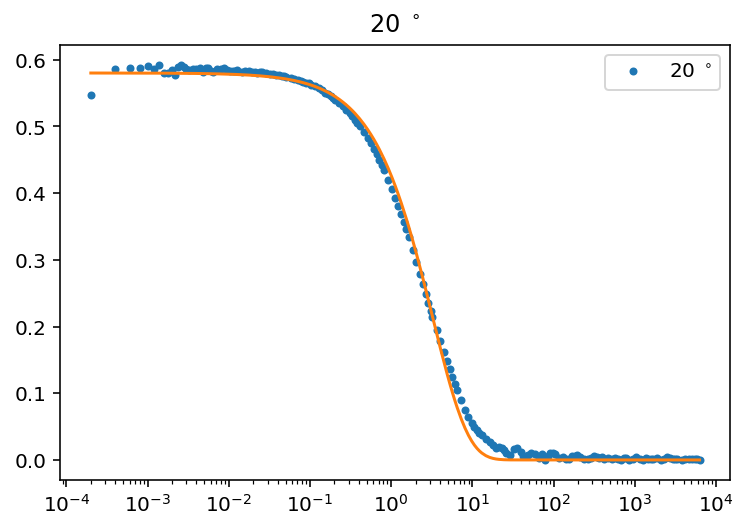

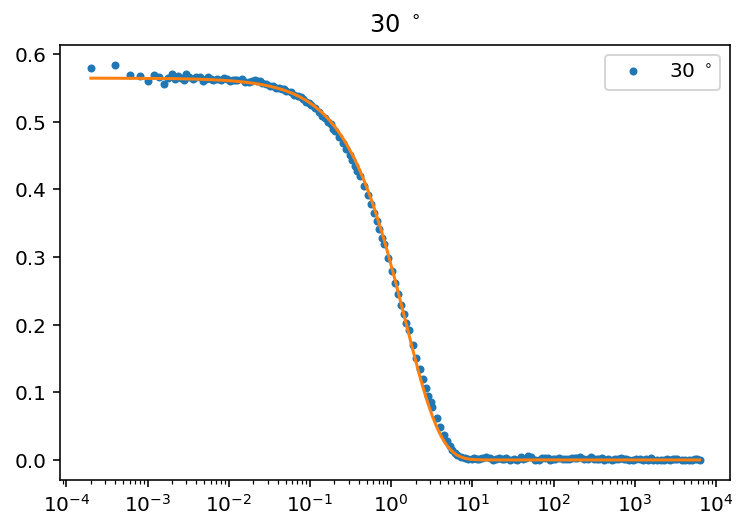

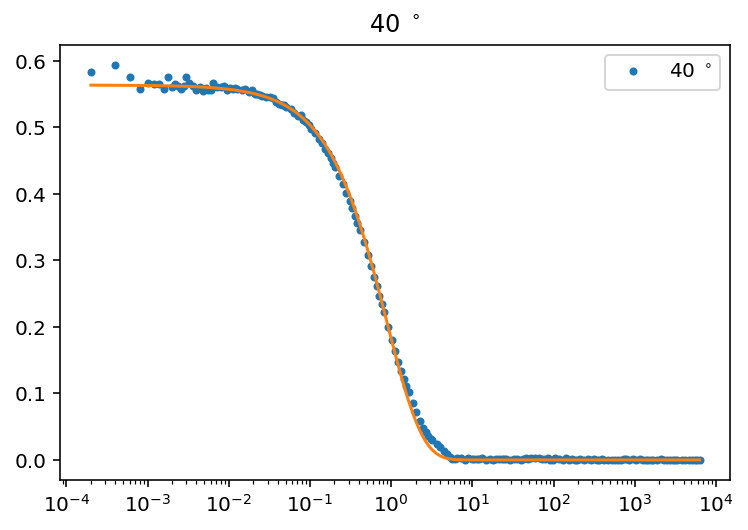

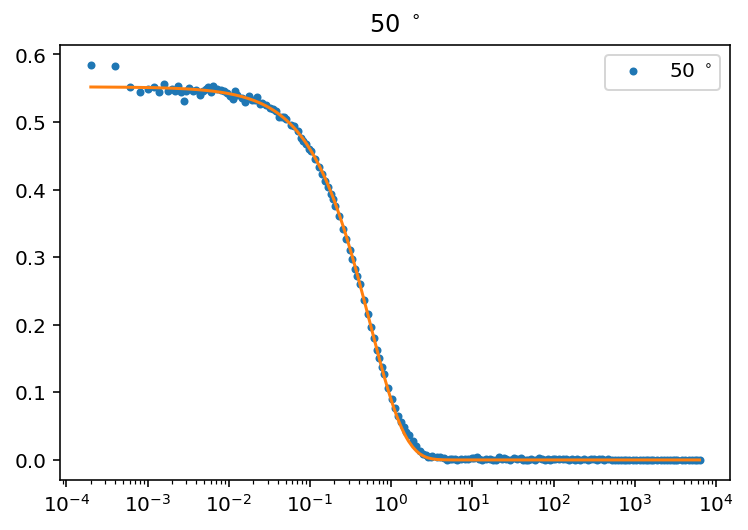

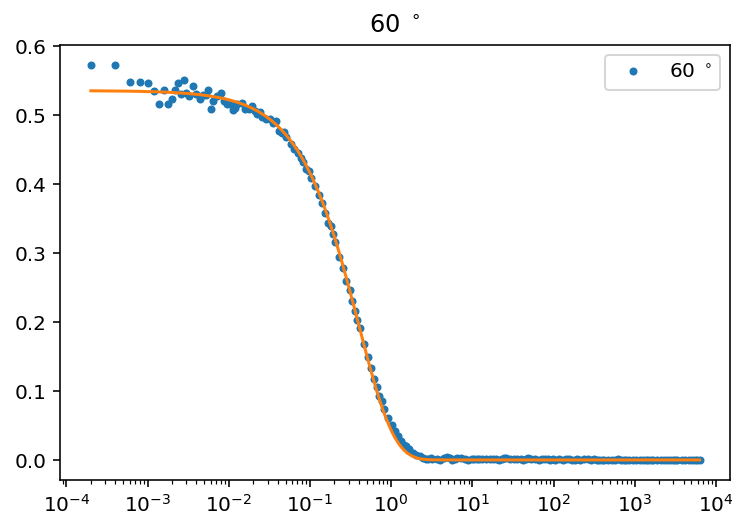

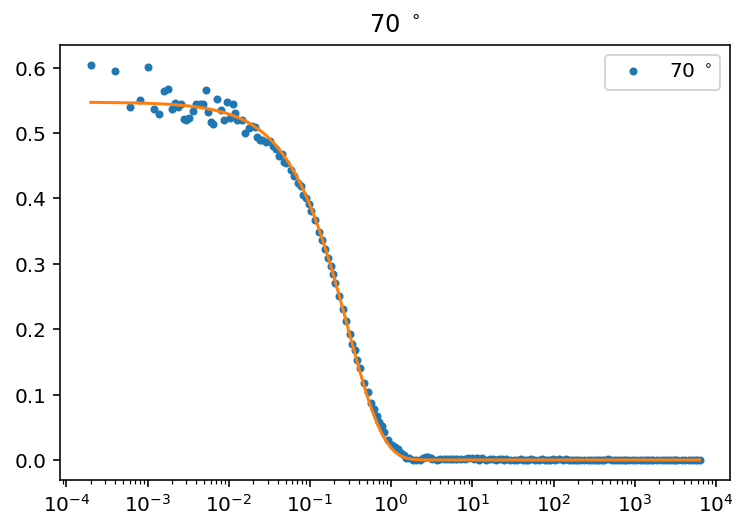

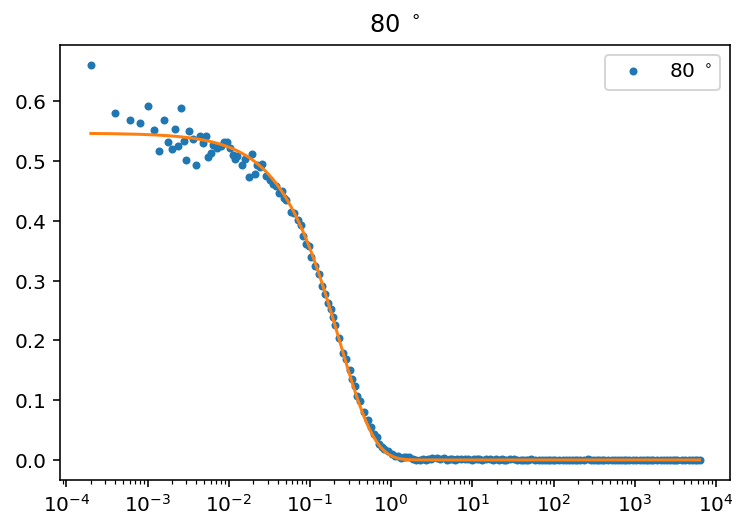

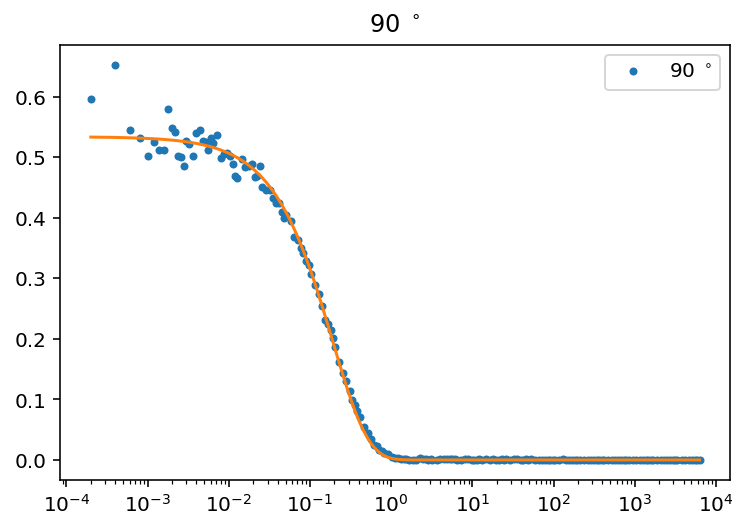

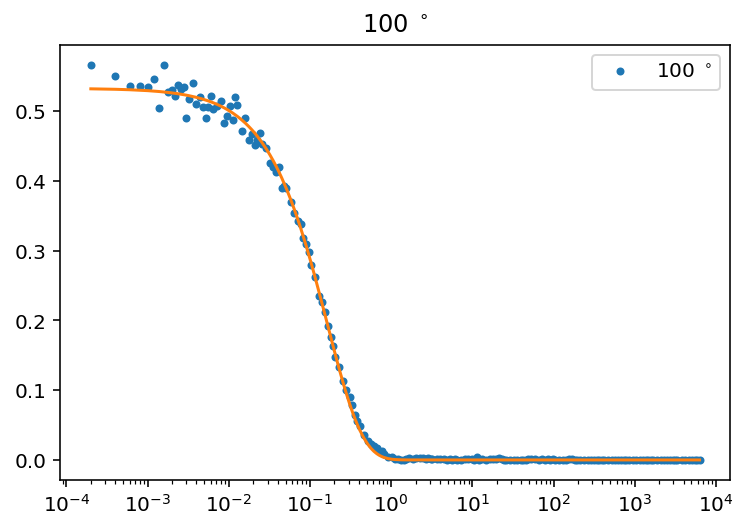

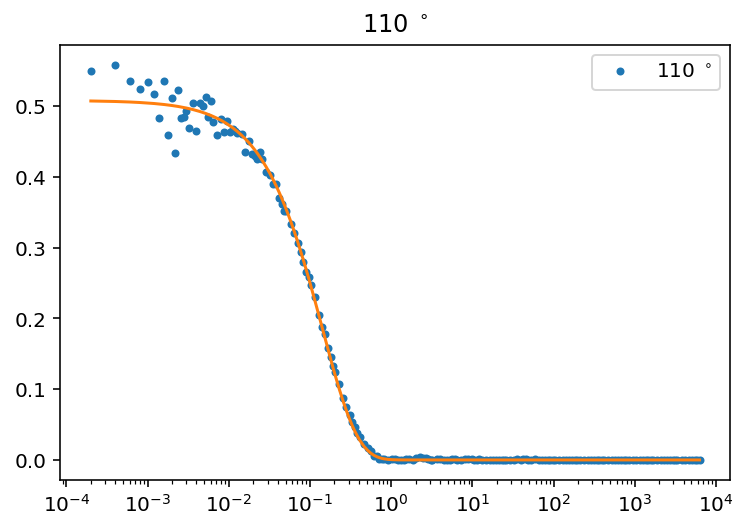

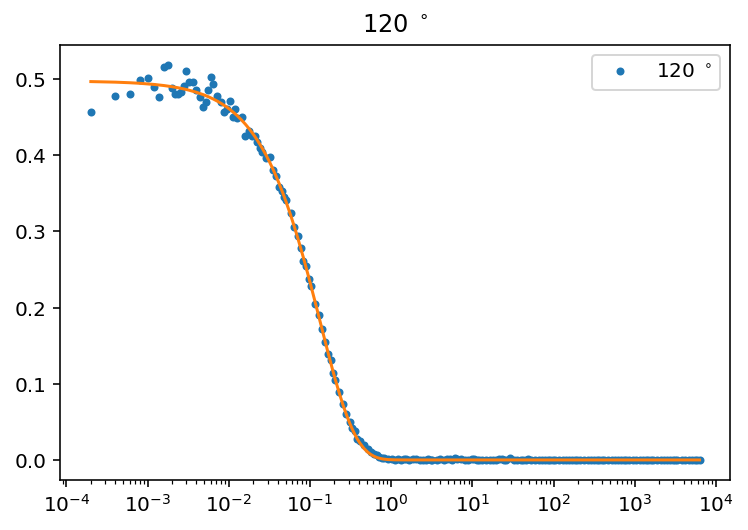

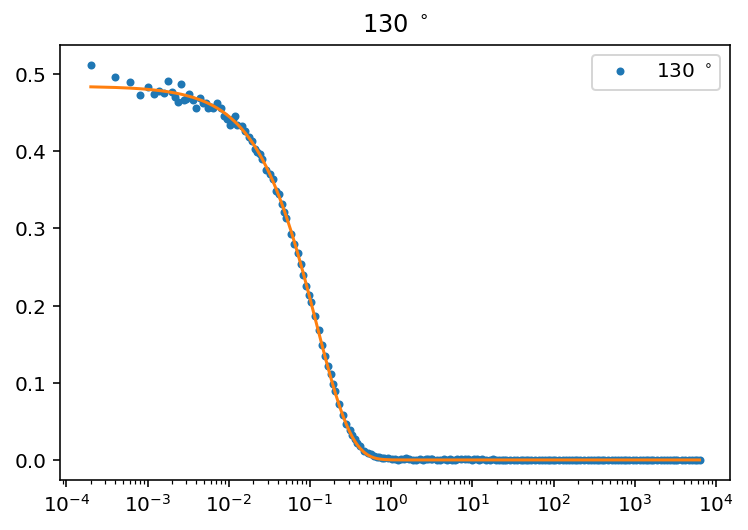

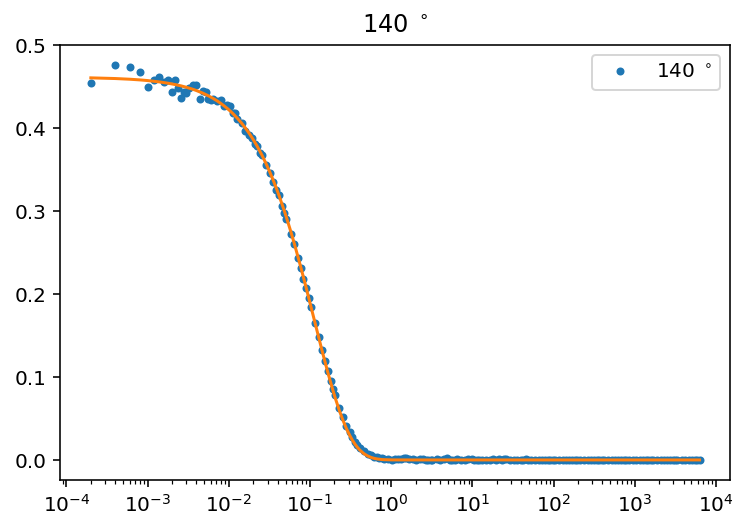

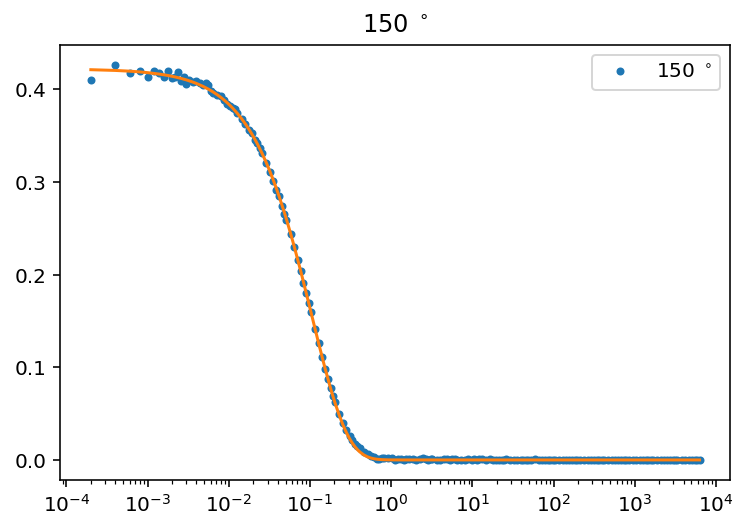

In [25]:
#Viele Plots B
namelist=[]
Ds=[]
for x in range(2,16):
     namelist.append("Data/B/{}.ASC".format(x*10))
for x in range(len(namelist)):
    Ds.append(plotcorr(namelist[x],angels[x],ax))
#plotcorr(namelist[0],angels[0],ax)
mean=np.mean(Ds)
print(mean)
print(const.Boltzmann*300/(6*np.pi*n*mean))

In [26]:
print(const.Boltzmann*300/(6*np.pi*vi*mean))

2.3301748960514033e-05


In [27]:
#B
def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    q=calcq(labels)
    D=1
    #popt,pcov=sci.optimize.curve_fit(g,time,corr,p0=0)
    lin=np.linspace(0,time[182],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time,D,C:g2(time,D,C,q) ,time,corr , p0=(1e-17,.3))
    print(popt)
    fig,ax=plt.subplots(dpi=144)

    ax.plot(time,(np.abs(corr)),".",label=r"{} $^\circ$".format(labels))
    ax.plot(time,g2(time,*popt,q))
    ax.semilogx()
    ax.set_title(r"C {} $^\circ$".format(labels))
    ax.legend()
    fig.savefig(r"Plots/C bei 40")
    return(popt[0])

[3.81102249e-15 5.29786396e-01]
3.811022485548979e-15
2.94325110785567e-05


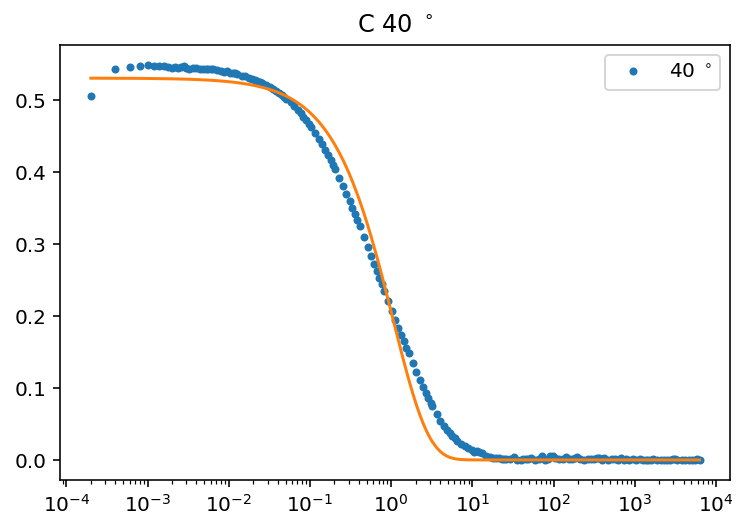

In [28]:
#C



mean=plotcorr("Data/C.ASC",40,0)

#plotcorr(namelist[0],angels[0],ax)
print(mean)
print(const.Boltzmann*300/(6*np.pi*vi*mean))

In [29]:
#B
def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    q=calcq(labels)
    fig,ax=plt.subplots(dpi=300)
    ax.plot(time,(np.abs(corr)),".",label=r"{} $^\circ$".format(labels))
    #popt,pcov=sci.optimize.curve_fit(g,time,corr,p0=0)
    grenze=100
    time1=time[:grenze]
    corr1=corr[:grenze]
    A=0.17
    lin=np.linspace(0,time[grenze-1],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time1,D,C:g2(time1,D,C,q,A) ,time1,corr1 , p0=(1e-18,.4))
    print(popt)
    ax.plot(time1,g2(time1,*popt,q,A))
    
    time2=time[grenze:]
    corr2=corr[grenze:]
    A=0
    lin=np.linspace(time[100],time[182],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time2,D,C:g2(time2,D,C,q,A) ,time2,corr2 , p0=(1e-18,.4))
    print(popt)
    ax.plot(time2,g2(time2,*popt,q,A))

  
    
    ax.loglog()
    #ax.semilogx()
    ax.set_title(r"D {} $^\circ$".format(labels))
    ax.legend()
    fig.savefig(r"Plots/D bei 40")
    fig,ax=plt.subplots(dpi=300)
    ax.plot(time2,(np.abs(corr2)),".",label=r"{} $^\circ$".format(labels))
    ax.plot(time2,g2(time2,*popt,q,A))
    ax.loglog()
    fig.savefig(r"Plots/D nur der letzte Teil")
   #ax.semilogy()
    return(popt[0])

[1.76871488e-14 2.60418265e-01]
[4.25229222e-19 1.62260977e-01]
4.252292223093025e-19
0.26378234524286875


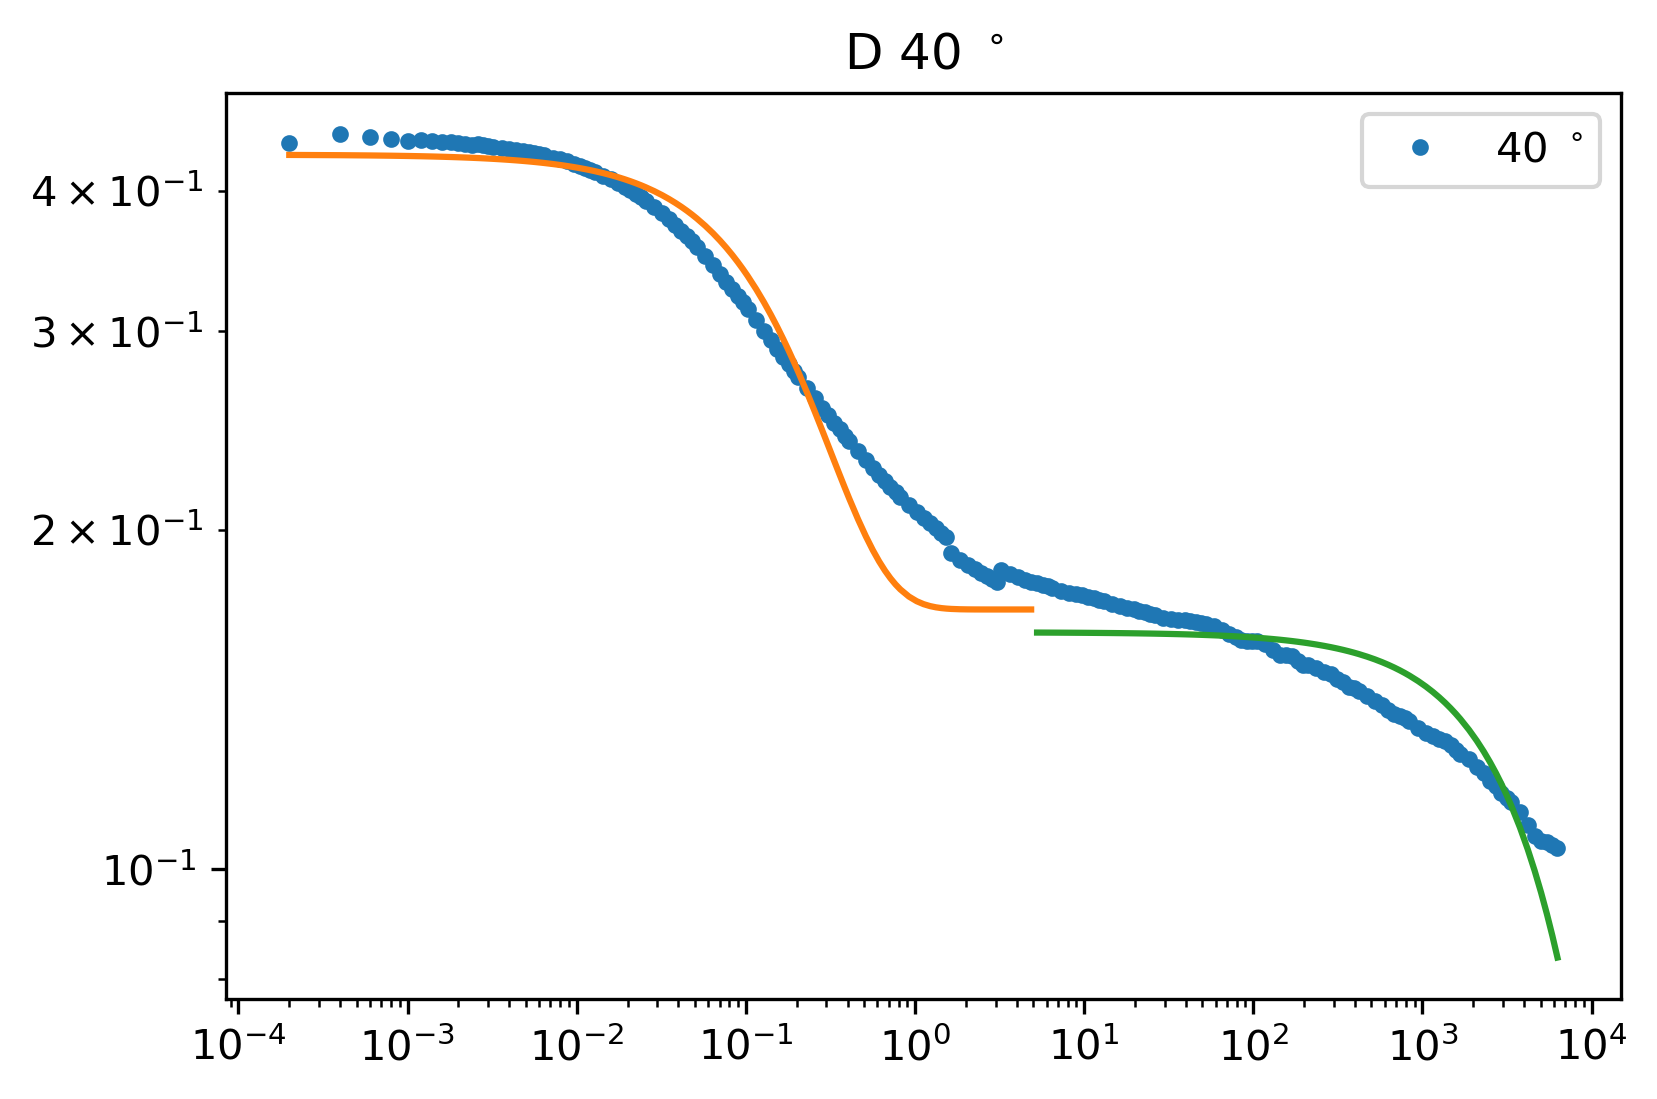

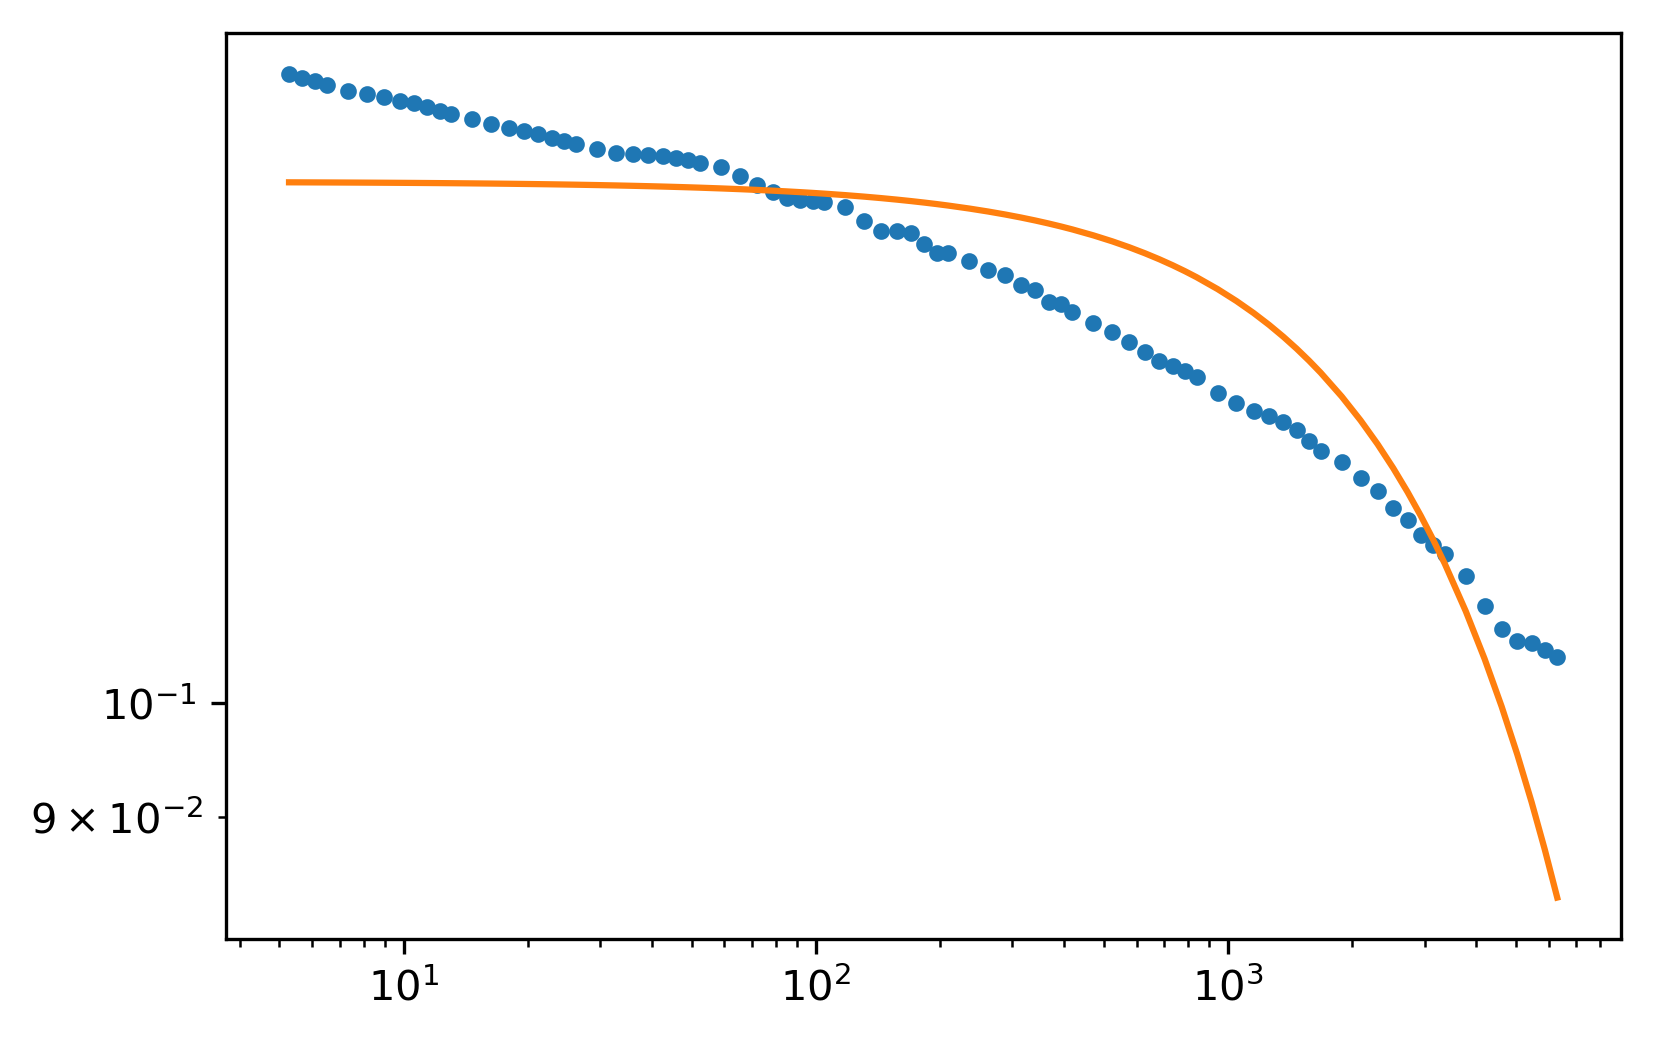

In [30]:
#D
def g2(tau,D,C,q,A):
    return np.exp(-2*q**2*D*tau)*C+A



mean=plotcorr("Data/D.ASC",40,0)

#plotcorr(namelist[0],angels[0],ax)
print(mean)
print(const.Boltzmann*300/(6*np.pi*vi*mean))